In [782]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [783]:
df=pd.read_csv("mushrooms.csv")

In [784]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [785]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [786]:
#(classes: edible=e, poisonous=p)

#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

#bruises: bruises=t,no=f

#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

#gill-attachment: attached=a,descending=d,free=f,notched=n

#gill-spacing: close=c,crowded=w,distant=d

#gill-size: broad=b,narrow=n

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

#stalk-shape: enlarging=e,tapering=t

#stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

#stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#veil-type: partial=p,universal=u

#veil-color: brown=n,orange=o,white=w,yellow=y

#ring-number: none=n,one=o,two=t

#ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

#spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

#population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

#habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# target column is classes


In [787]:
df["cap-shape"]=df["cap-shape"].apply(lambda x:"bell" if x=="b" else "conical" if x=="c" else "convex" if x=="x" else "flat"  if x=="f" else "knobbed" if x=="k" else "sunken" )

In [788]:
df["cap-surface"]=df["cap-surface"].apply(lambda x:"fibrous" if x=="f" else "grooves" if x=="g" else "scaly" if x=="y" else "smooth")
df["cap-color"]=df["cap-color"].apply(lambda x:"brown" if x=="n" else "buff" if x=="b" else "cinnamon" if x=="c" else "gray" if x=="g" else "green" if x=="r" else "pink" if x=="p" else "purple" if x=="u" else "red" if x=="e" else "white" if x=="w" else "yellow")  

In [789]:
df["bruises"]=df["bruises"].apply(lambda x:"bruises" if x=="t" else "no")
df["class"]=df["class"].apply(lambda x:"edible" if x=="e" else "poisonous")
df["odor"]=df["odor"].apply(lambda x:"almond" if x=="a" else "anise" if x=="l" else "creosote" if x=="c" else "fishy" if x=="y" else "foul" if x=="f" else "musty" if x=="m" else "none" if x=="n" else "pungent" if x=="p" else "spicy")
df["gill-attachment"]=df["gill-attachment"].apply(lambda x:"attached" if x=="a" else "descending" if x=="d" else "free" if x=="f" else "notched")
df["gill-spacing"]=df["gill-spacing"].apply(lambda x:"close" if x=="c" else "crowded" if x=="w" else "distant")
df["gill-size"]=df["gill-size"].apply(lambda x:"broad" if x=="b" else "narrow" )
df["gill-color"]=df["gill-color"].apply(lambda x:"black" if x=="k" else "brown" if x=="n" else "buff" if x=="b" else "chocolate" if x=="h" else "gray" if x=="g" else "green" if x=="r" else "orange" if x=="o" else "pink" if x=="p" else "purple" if x=="u" else "red" if x=="e" else "white" if x=="w" else "yellow")
df["stalk-shape"]=df["stalk-shape"].apply(lambda x:"enlarging" if x=="e" else "tapering")
df["stalk-root"]=df["stalk-root"].apply(lambda x:"bulbous" if x=="b"else "club" if x=="c" else "cup" if x=="u" else "equal" if x=="e" else "rhizomorphs" if x=="z" else "rooted" if x=="r" else "missing")
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].apply(lambda x:"fibrous" if x=="f" else "scaly" if x=="y" else "silky" if x=="k" else "smooth")
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].apply(lambda x:"fibrous" if x=="f" else "scaly" if x=="y" else "silky" if x=="k" else "smooth")
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].apply(lambda x:"brown" if x=="n" else "buff" if x=="b" else "cinnamon" if x=="c" else "gray" if x=="g" else "orange" if x=="o" else "pink" if x=="p" else "red" if x=="e" else "white" if x=="w" else "yellow")
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].apply(lambda x:"brown" if x=="n" else "buff" if x=="b" else "cinnamon" if x=="c" else "gray" if x=="g" else "orange" if x=="o" else "pink" if x=="p" else "red" if x=="e" else "white" if x=="w" else "yellow")
df["veil-type"]=df["veil-type"].apply(lambda x:"partial" if x=="p" else "universal")
df["veil-color"]=df["veil-color"].apply(lambda x:"brown" if x=="n" else "orange" if x=="o" else "white" if x=="w" else "yellow")
df["ring-number"]=df["ring-number"].apply(lambda x:"none" if x=="n" else "one" if x=="o" else "two")
df["ring-type"]=df["ring-type"].apply(lambda x:"cobwebby" if x=="c" else "evanescent" if x=="e" else "flaring" if x=="f" else "large" if x=="l" else "none" if x=="n" else "pendant" if x=="p" else "sheathing" if x=="s" else "zone")
df["spore-print-color"]=df["spore-print-color"].apply(lambda x:"black" if x=="k" else "brown" if x=="n" else "buff" if x=="b" else "chocolate" if x=="h" else "green" if x=="r" else "orange" if x=="o" else "purple" if x=="u" else "white" if x=="w" else "yellow")
df["population"]=df["population"].apply(lambda x:"abundant" if x=="a" else "clustered" if x=="c" else "numerous" if x=="n"  else "scattered" if x=="s" else "several" if x=="v" else "solitary")
df["habitat"]=df["habitat"].apply(lambda x:"grasses" if x=="g" else "leaves" if x=="l" else "meadows" if x=="m" else "paths" if x=="p" else "urban" if x=="u" else "waste" if x=="w" else "woods")

In [790]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [791]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [793]:
#checking for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [794]:
#checking for duplicates 
df.duplicated().sum()

0

### univariate analysis

In [795]:
#class
df["class"].unique()

array(['poisonous', 'edible'], dtype=object)

In [796]:
df["class"].value_counts()

class
edible       4208
poisonous    3916
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

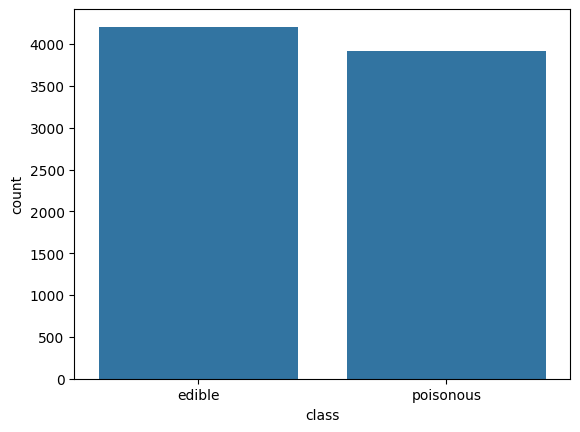

In [797]:
sns.barplot(df["class"].value_counts())

In [798]:
# 51.797 mushrooms are audible while 48.202 are poisonous

In [799]:
df["cap-shape"].unique()

array(['convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'],
      dtype=object)

In [800]:
df["cap-shape"].value_counts()

cap-shape
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: count, dtype: int64

<Axes: xlabel='cap-shape', ylabel='count'>

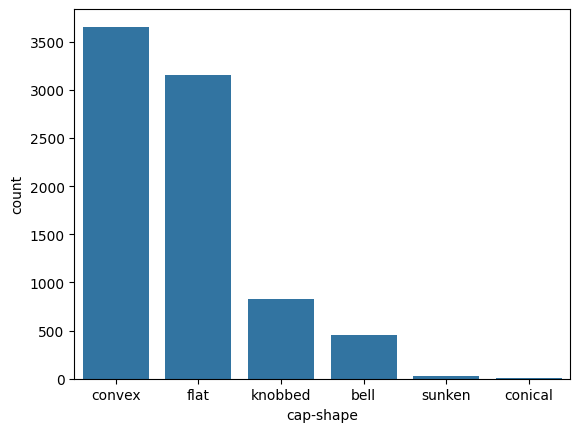

In [801]:
sns.barplot(df["cap-shape"].value_counts())

In [802]:
# most of the mushrooms are having convex shape

In [803]:
df["cap-color"].unique()

array(['brown', 'yellow', 'white', 'gray', 'red', 'pink', 'buff',
       'purple', 'cinnamon', 'green'], dtype=object)

In [804]:
df["cap-color"].value_counts()

cap-color
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'brown'),
  Text(1, 0, 'gray'),
  Text(2, 0, 'red'),
  Text(3, 0, 'yellow'),
  Text(4, 0, 'white'),
  Text(5, 0, 'buff'),
  Text(6, 0, 'pink'),
  Text(7, 0, 'cinnamon'),
  Text(8, 0, 'purple'),
  Text(9, 0, 'green')])

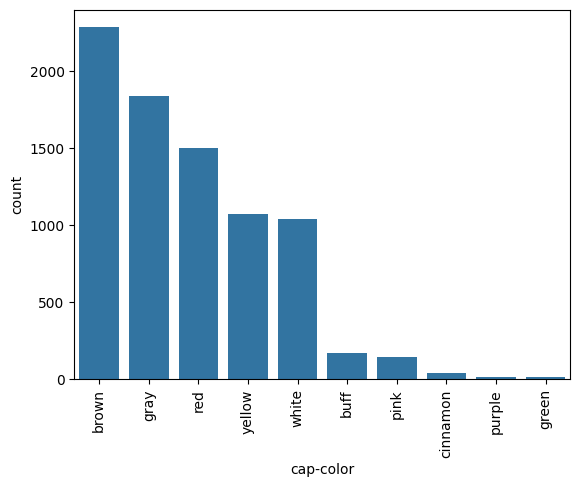

In [805]:
sns.barplot(df["cap-color"].value_counts())
plt.xticks(rotation=90)

In [806]:
# most of the mushrooms cap-color is brown

In [807]:
#bruises
df["bruises"].unique()

array(['bruises', 'no'], dtype=object)

In [808]:
df["bruises"].value_counts()

bruises
no         4748
bruises    3376
Name: count, dtype: int64

<Axes: xlabel='bruises', ylabel='count'>

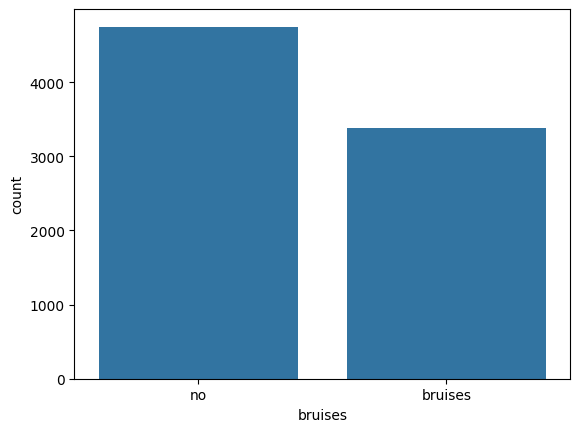

In [809]:
sns.barplot(df["bruises"].value_counts())

In [810]:
# 41.55 percent mushrooms have bruises while 58.444 percent dont have

In [811]:
df["odor"].unique()

array(['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy',
       'spicy', 'musty'], dtype=object)

In [812]:
df["odor"].value_counts()

odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

<Axes: xlabel='odor', ylabel='count'>

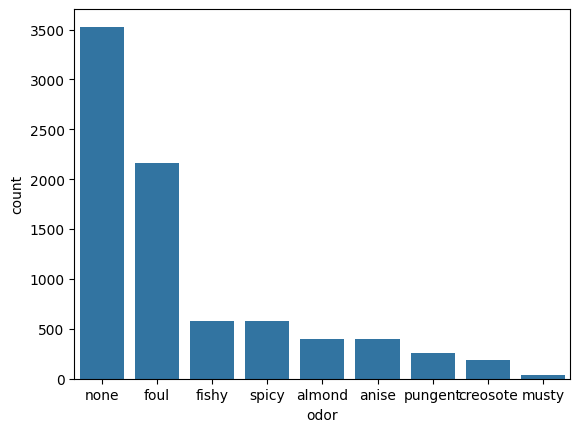

In [813]:
sns.barplot(df["odor"].value_counts())

In [814]:
# most of the musshrooms dont have any odor

In [815]:
#gill-attachment
df["gill-attachment"].unique()

array(['free', 'attached'], dtype=object)

In [816]:
df["gill-attachment"].value_counts()

gill-attachment
free        7914
attached     210
Name: count, dtype: int64

<Axes: xlabel='gill-attachment', ylabel='count'>

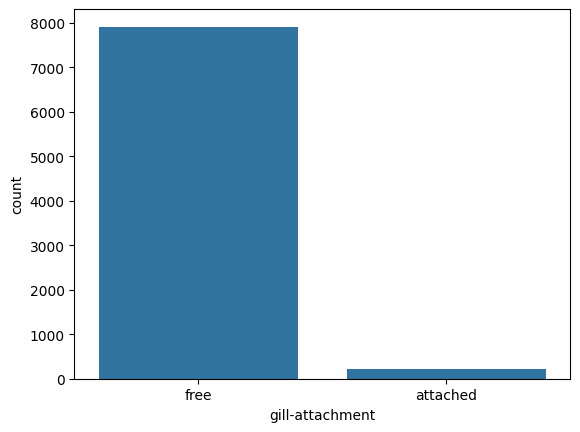

In [817]:
sns.barplot(df["gill-attachment"].value_counts())

In [818]:
# most of the mushrooms have free gill- attachment

In [819]:
df["gill-spacing"].unique()

array(['close', 'crowded'], dtype=object)

In [820]:
df["gill-spacing"].value_counts()

gill-spacing
close      6812
crowded    1312
Name: count, dtype: int64

<Axes: xlabel='gill-spacing', ylabel='count'>

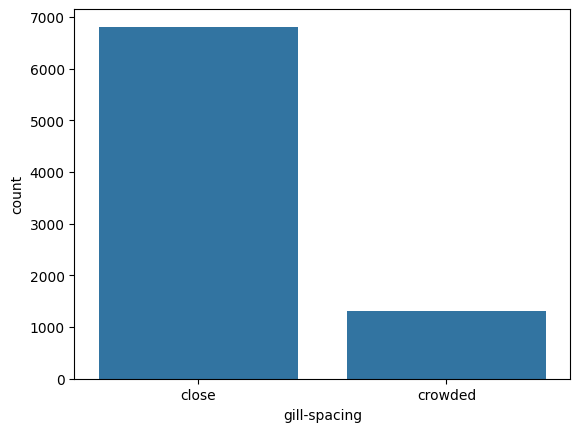

In [821]:
sns.barplot(df["gill-spacing"].value_counts())

In [822]:
# most of the mushrooms have closed gill-spacing

In [823]:
df["gill-size"].unique()

array(['narrow', 'broad'], dtype=object)

In [824]:
df["gill-size"].value_counts()

gill-size
broad     5612
narrow    2512
Name: count, dtype: int64

<Axes: xlabel='gill-size', ylabel='count'>

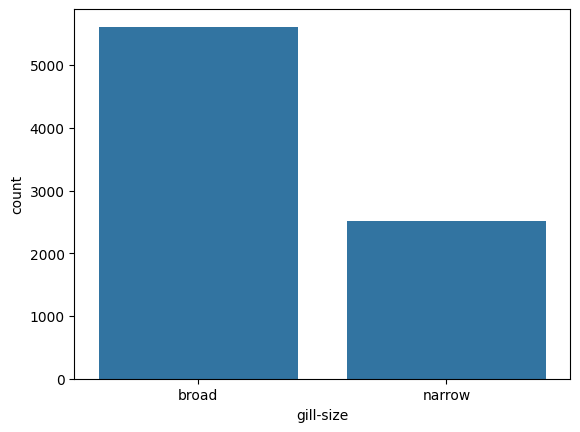

In [825]:
sns.barplot(df["gill-size"].value_counts())

In [826]:
# most of the mushrooms have broad gill size

In [827]:
df["gill-color"].unique()

array(['black', 'brown', 'gray', 'pink', 'white', 'chocolate', 'purple',
       'red', 'buff', 'green', 'yellow', 'orange'], dtype=object)

In [828]:
df["gill-color"].value_counts()

gill-color
buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'buff'),
  Text(1, 0, 'pink'),
  Text(2, 0, 'white'),
  Text(3, 0, 'brown'),
  Text(4, 0, 'gray'),
  Text(5, 0, 'chocolate'),
  Text(6, 0, 'purple'),
  Text(7, 0, 'black'),
  Text(8, 0, 'red'),
  Text(9, 0, 'yellow'),
  Text(10, 0, 'orange'),
  Text(11, 0, 'green')])

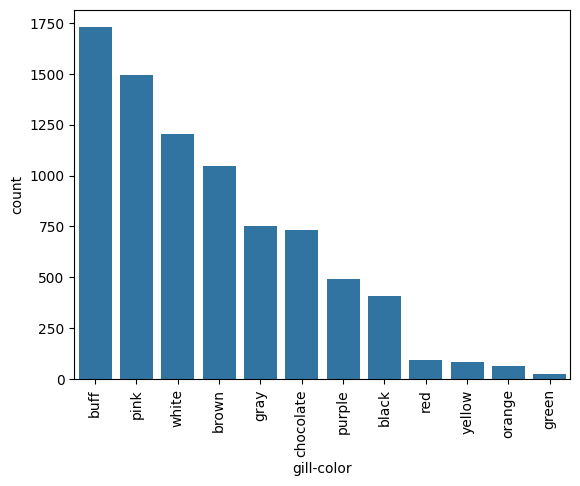

In [829]:
sns.barplot(df["gill-color"].value_counts())
plt.xticks(rotation=90)

In [830]:
# most of the mushrooms gill color is buff

In [831]:
df["stalk-shape"].unique()

array(['enlarging', 'tapering'], dtype=object)

In [832]:
df["stalk-shape"].value_counts()

stalk-shape
tapering     4608
enlarging    3516
Name: count, dtype: int64

<Axes: xlabel='stalk-shape', ylabel='count'>

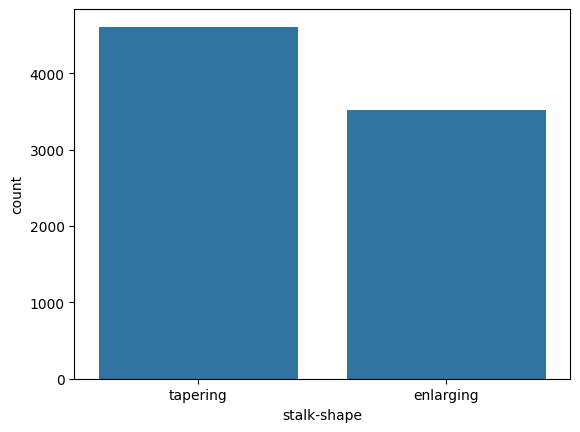

In [833]:
sns.barplot(df["stalk-shape"].value_counts())

In [834]:
# most of the mushrooms stalk-shape is tapering shape

In [835]:
df["stalk-root"].unique()

array(['equal', 'club', 'bulbous', 'rooted', 'missing'], dtype=object)

In [836]:
df["stalk-root"].value_counts()

stalk-root
bulbous    3776
missing    2480
equal      1120
club        556
rooted      192
Name: count, dtype: int64

<Axes: xlabel='stalk-root', ylabel='count'>

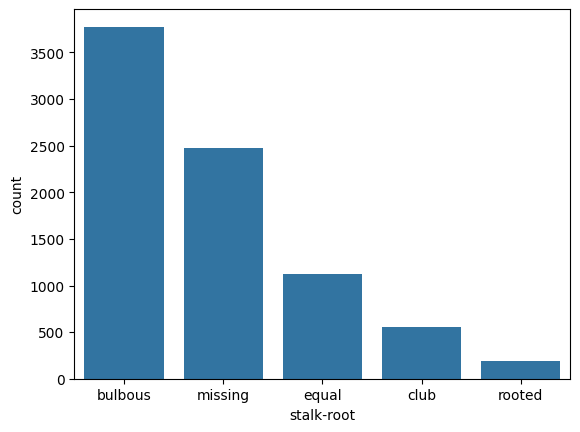

In [837]:
sns.barplot(df["stalk-root"].value_counts())

In [838]:
# most of the mushrooms stalk-shape is bulbous

In [839]:
df["stalk-surface-above-ring"].unique()

array(['smooth', 'fibrous', 'silky', 'scaly'], dtype=object)

In [840]:
df["stalk-surface-above-ring"].value_counts()

stalk-surface-above-ring
smooth     5176
silky      2372
fibrous     552
scaly        24
Name: count, dtype: int64

<Axes: xlabel='stalk-surface-above-ring', ylabel='count'>

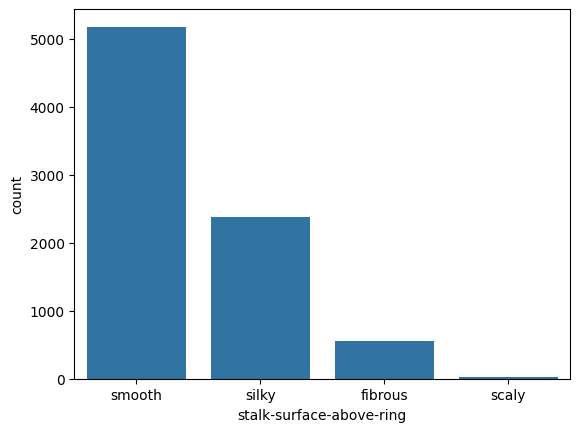

In [841]:
sns.barplot(df["stalk-surface-above-ring"].value_counts())

In [842]:
# most of the mushrooms stalk-surface-above-ring is smooth

In [843]:
df["stalk-surface-below-ring"].unique()

array(['smooth', 'fibrous', 'scaly', 'silky'], dtype=object)

In [844]:
df["stalk-surface-below-ring"].value_counts()

stalk-surface-below-ring
smooth     4936
silky      2304
fibrous     600
scaly       284
Name: count, dtype: int64

<Axes: xlabel='stalk-surface-below-ring', ylabel='count'>

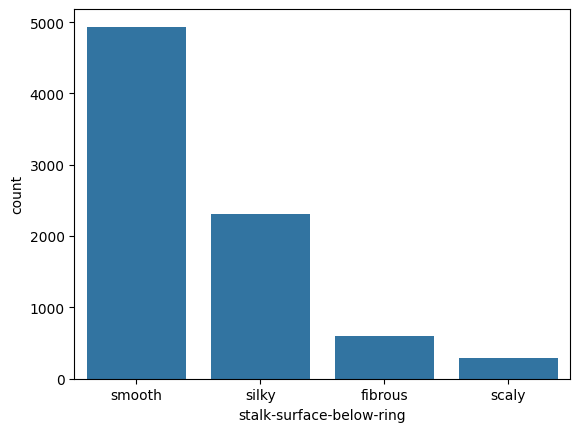

In [845]:
sns.barplot(df["stalk-surface-below-ring"].value_counts())

In [846]:
# most of the mushrooms stalk-surface-below-ring is sooth

In [847]:
df["stalk-color-above-ring"].unique()

array(['white', 'gray', 'pink', 'brown', 'buff', 'red', 'orange',
       'cinnamon', 'yellow'], dtype=object)

In [848]:
df["stalk-color-above-ring"].value_counts()

stalk-color-above-ring
white       4464
pink        1872
gray         576
brown        448
buff         432
orange       192
red           96
cinnamon      36
yellow         8
Name: count, dtype: int64

<Axes: xlabel='stalk-color-above-ring', ylabel='count'>

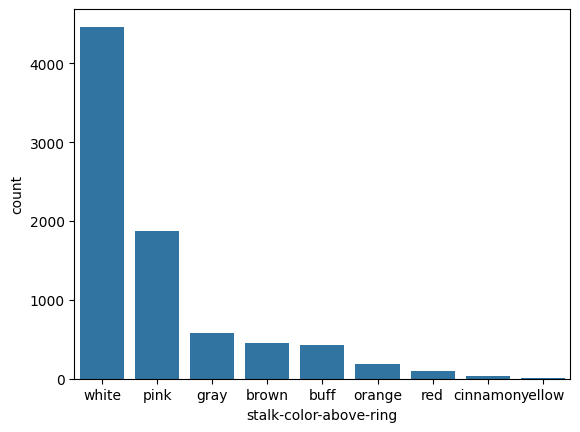

In [849]:
sns.barplot(df["stalk-color-above-ring"].value_counts())

In [850]:
# most of the mushrooms stalk-color-above-ring is white

In [851]:
df["stalk-color-below-ring"].unique()

array(['white', 'pink', 'gray', 'buff', 'brown', 'red', 'yellow',
       'orange', 'cinnamon'], dtype=object)

In [852]:
df["stalk-color-below-ring"].value_counts()

stalk-color-below-ring
white       4384
pink        1872
gray         576
brown        512
buff         432
orange       192
red           96
cinnamon      36
yellow        24
Name: count, dtype: int64

<Axes: xlabel='stalk-color-below-ring', ylabel='count'>

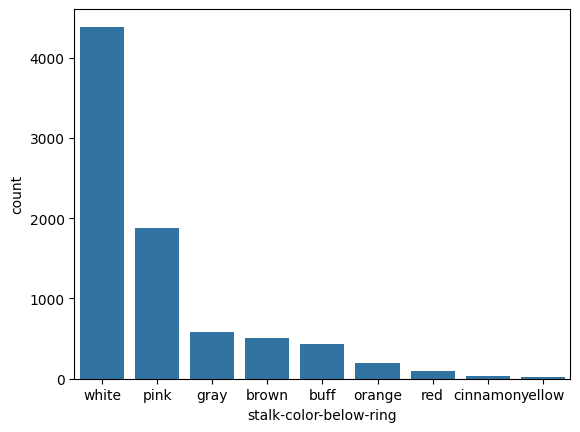

In [853]:
sns.barplot(df["stalk-color-below-ring"].value_counts())

In [854]:
# most of the mushrooms stalk-color-below-ring is white

In [855]:
df["veil-type"].unique()

array(['partial'], dtype=object)

In [856]:
# since it has only one value it is not required for our analysis spo removing it
df.drop(columns="veil-type",inplace=True)

In [857]:
df["veil-color"].unique()

array(['white', 'brown', 'orange', 'yellow'], dtype=object)

In [858]:
df["veil-color"].value_counts()

veil-color
white     7924
brown       96
orange      96
yellow       8
Name: count, dtype: int64

<Axes: xlabel='veil-color', ylabel='count'>

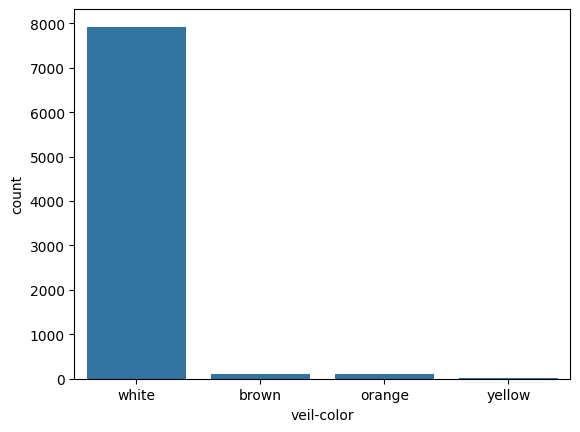

In [859]:
sns.barplot(df["veil-color"].value_counts())

In [860]:
# most of the mushrooms veil color is white

In [861]:
df["ring-number"].unique()

array(['one', 'two', 'none'], dtype=object)

In [862]:
df["ring-number"].value_counts()

ring-number
one     7488
two      600
none      36
Name: count, dtype: int64

<Axes: xlabel='ring-number', ylabel='count'>

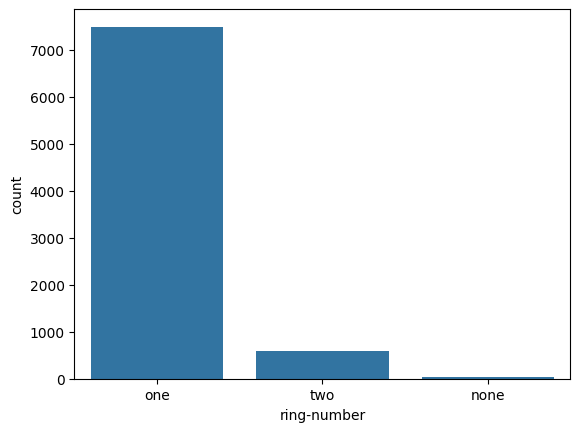

In [863]:
sns.barplot(df["ring-number"].value_counts())

In [864]:
# most of the mushrooms have only one ring 

In [865]:
df["ring-type"].unique()

array(['pendant', 'evanescent', 'large', 'flaring', 'none'], dtype=object)

In [866]:
df["ring-type"].value_counts()

ring-type
pendant       3968
evanescent    2776
large         1296
flaring         48
none            36
Name: count, dtype: int64

<Axes: xlabel='ring-type', ylabel='count'>

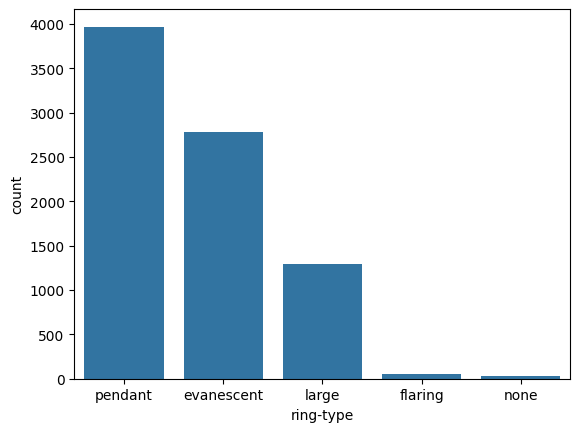

In [867]:
sns.barplot(df["ring-type"].value_counts())

In [868]:
#most of the mushrooms have pendant ring type

In [869]:
df["spore-print-color"].unique()

array(['black', 'brown', 'purple', 'chocolate', 'white', 'green',
       'orange', 'yellow', 'buff'], dtype=object)

In [870]:
df["spore-print-color"].value_counts()

spore-print-color
white        2388
brown        1968
black        1872
chocolate    1632
green          72
purple         48
orange         48
yellow         48
buff           48
Name: count, dtype: int64

<Axes: xlabel='spore-print-color', ylabel='count'>

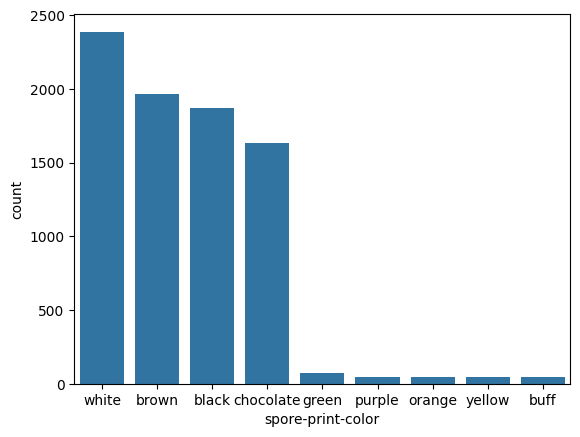

In [871]:
sns.barplot(df["spore-print-color"].value_counts())

In [872]:
# most of the mushrooms spore-print-color is white

In [873]:
df["population"].unique()

array(['scattered', 'numerous', 'abundant', 'several', 'solitary',
       'clustered'], dtype=object)

In [874]:
df["population"].value_counts()

population
several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: count, dtype: int64

<Axes: xlabel='population', ylabel='count'>

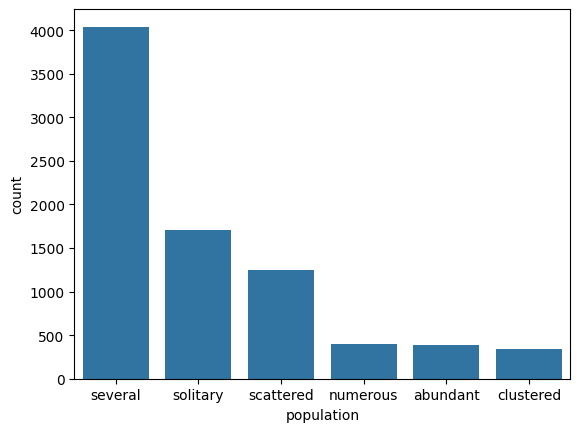

In [875]:
sns.barplot(df["population"].value_counts())

In [876]:
df["habitat"].value_counts()

habitat
woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: count, dtype: int64

<Axes: xlabel='habitat', ylabel='count'>

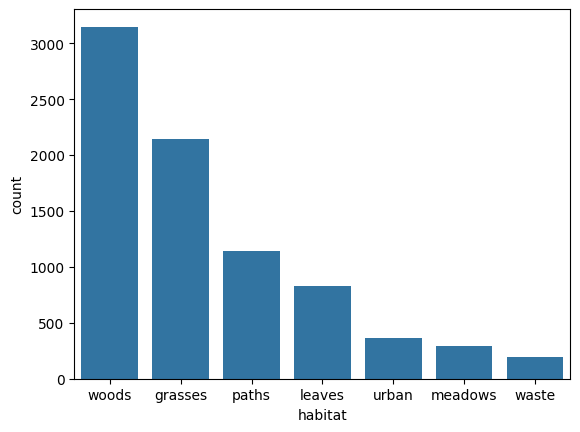

In [877]:
sns.barplot(df["habitat"].value_counts())

In [878]:
# most of the mushrooms habitat is woods

### bivariate analysis

In [879]:
#checking if there is any relationship betn cap-shape and class
x=pd.crosstab(df["cap-shape"],df["class"])

In [880]:
x

class,edible,poisonous
cap-shape,,
bell,404,48
conical,0,4
convex,1948,1708
flat,1596,1556
knobbed,228,600
sunken,32,0


In [881]:
chi2,p,dof,expected=stats.chi2_contingency(x)

In [882]:
p

1.196456568593578e-103

In [883]:
# so the columns are dependent on each other

In [884]:
f=pd.crosstab(df["class"],df["cap-surface"])

In [885]:
f

cap-surface,fibrous,grooves,scaly,smooth
class,,,,
edible,1560,0,1504,1144
poisonous,760,4,1740,1412


In [886]:
chi2,p,dof,expected=stats.chi2_contingency(f)

In [887]:
p

5.518427038649143e-68

In [888]:
# so both columns are dependent on each other

In [889]:
g=pd.crosstab(df["cap-color"],df["class"])

In [890]:
g

class,edible,poisonous
cap-color,,
brown,1264,1020
buff,48,120
cinnamon,32,12
gray,1032,808
green,16,0
pink,56,88
purple,16,0
red,624,876
white,720,320


In [891]:
chi2,p,dof,expected=stats.chi2_contingency(g)

In [892]:
p

6.055814598336574e-78

In [893]:
# so both coloumns dependent on each other

In [894]:
d=pd.crosstab(df["bruises"],df["class"])

In [895]:
d

class,edible,poisonous
bruises,,
bruises,2752,624
no,1456,3292


In [896]:
chi2,p,dof,expected=stats.chi2_contingency(d)

In [897]:
p

0.0

In [898]:
# so both coloumns dependent on each other,so we check z test

In [899]:
l=[2752,1456]
l1=[3376,4748]

In [900]:
from statsmodels.stats.proportion import proportions_ztest

In [901]:
z_stats,p_value=proportions_ztest(count=l,nobs=l1,alternative='two-sided')

In [902]:
p_value

0.0

In [903]:
# so the groups have different proportions

In [904]:
z_stats,p_value=proportions_ztest(count=l,nobs=l1,alternative='smaller')

In [905]:
p_value

1.0

In [906]:
# proportion of g1 >=g2

In [907]:
z_stats,p_value=proportions_ztest(count=l,nobs=l1,alternative='larger')

In [908]:
p_value

0.0

In [909]:
# proportion of g1>g2

In [910]:
# checking if there is any relationship betn odor and class
k=pd.crosstab(df["odor"],df["class"])

In [911]:
k

class,edible,poisonous
odor,,
almond,400,0
anise,400,0
creosote,0,192
fishy,0,576
foul,0,2160
musty,0,36
none,3408,120
pungent,0,256
spicy,0,576


In [912]:
chi2,p,dof,expected=stats.chi2_contingency(d)

In [913]:
p

0.0

In [914]:
# since p value is lesser than 5% so the columns are dependent on each other

In [915]:
# checking if there is any reln betn gill-attachment and class
o=pd.crosstab(df["gill-attachment"],df["class"])

In [916]:
o

class,edible,poisonous
gill-attachment,,
attached,192,18
free,4016,3898


In [917]:
chi2,P,dof,expected=stats.chi2_contingency(o)

In [918]:
P

5.501707411861009e-31

In [919]:
# since it is less than 5% the columns are dependent on each other
# performing z test as there are two categories

In [920]:
p1=[192,4016]
p2=[210,7914]

In [921]:
z_stats,p_value=proportions_ztest(count=p1,nobs=p2,alternative='two-sided')

In [922]:
p_value

2.427477168071254e-31

In [923]:
# the proportions of p1 and p2 are not same

In [924]:
z_stats,p_value=proportions_ztest(count=p1,nobs=p2,alternative='smaller')

In [925]:
p_value

1.0

In [926]:
# the proportion of p1 >=p2

In [927]:
z_stats,p_value=proportions_ztest(count=p1,nobs=p2,alternative='larger')

In [928]:
p_value

1.213738584035627e-31

In [929]:
#the proportion of p1 greater than p2

In [930]:
#gill-spacing
e=pd.crosstab(df["gill-spacing"],df["class"])

In [931]:
e

class,edible,poisonous
gill-spacing,,
close,3008,3804
crowded,1200,112


In [932]:
chi2,P,dof,expected=stats.chi2_contingency(e)

In [933]:
P

5.0229776137324786e-216

In [934]:
# less than 5% so they are dependent on each other
# performing z test since there are two categories in both columns

In [935]:
k1=[3008,1200]
k2=[6812,1312]

In [936]:
z_stats,p_value=proportions_ztest(count=k1,nobs=k2,alternative='two-sided')

In [937]:
p_value

1.946774580056179e-216

In [938]:
# less than 5% ,so mean proportions are not same

In [939]:
z_stats,p_value=proportions_ztest(count=k1,nobs=k2,alternative='smaller')

In [940]:
p_value

9.733872900280896e-217

In [941]:
# less than 5% so proportions of k1 <k2

In [942]:
z_stats,p_value=proportions_ztest(count=k1,nobs=k2,alternative='larger')

In [943]:
p_value

1.0

In [944]:
# so mean proportions pf k1>=k2

In [945]:
#gill-size
a=pd.crosstab(df["gill-size"],df["class"])

In [946]:
a

class,edible,poisonous
gill-size,,
broad,3920,1692
narrow,288,2224


In [947]:
chi2,P,dof,expected=stats.chi2_contingency(a)

In [948]:
P

0.0

In [949]:
# the columns are dependent on each other 
# performing z test

In [950]:
a1=[3920,288]
a2=[5612,2512]

In [951]:
z_stats,p_value=proportions_ztest(count=a1,nobs=a2,alternative='two-sided')

In [952]:
p_value

0.0

In [953]:
# the mean proportions are different

In [954]:
z_stats,p_value=proportions_ztest(count=a1,nobs=a2,alternative='smaller')

In [955]:
p_value

1.0

In [956]:
# proportions of a1>=a2

In [957]:
z_stats,p_value=proportions_ztest(count=a1,nobs=a2,alternative='larger')

In [958]:
p_value

0.0

In [959]:
# proportion of a1>a2

In [960]:
#gill-color
q=pd.crosstab(df["gill-color"],df["class"])

In [961]:
q

class,edible,poisonous
gill-color,,
black,344,64
brown,936,112
buff,0,1728
chocolate,204,528
gray,248,504
green,0,24
orange,64,0
pink,852,640
purple,444,48


In [962]:
chi2,P,dof,expected=stats.chi2_contingency(q)

In [963]:
P

0.0

In [964]:
# less than 5% so they are dependent

In [965]:
#stalk-shape
l=pd.crosstab(df["stalk-shape"],df["class"])

In [966]:
l

class,edible,poisonous
stalk-shape,,
enlarging,1616,1900
tapering,2592,2016


In [967]:
chi2,P,dof,expected=stats.chi2_contingency(l)

In [968]:
P

4.604746212155192e-20

In [969]:
# so they are dependent on each other

In [970]:
# performing z test
s1=[1616,2592]
s2=[3516,4608]

In [971]:
z_stats,p_value=proportions_ztest(count=s1,nobs=s2,alternative='two-sided')

In [972]:
p_value

3.739357224138261e-20

In [973]:
# less than 5% so the proportions of mean are different

In [974]:
z_stats,p_value=proportions_ztest(count=s1,nobs=s2,alternative='smaller')

In [975]:
p_value

1.8696786120691305e-20

In [976]:
# proportions of s1<s2

In [977]:
z_stats,p_value=proportions_ztest(count=s1,nobs=s2,alternative='larger')

In [978]:
p_value

1.0

In [979]:
# proportions of s1<=s2

In [980]:
w=pd.crosstab(df['stalk-root'],df["class"])

In [981]:
w

class,edible,poisonous
stalk-root,,
bulbous,1920,1856
club,512,44
equal,864,256
missing,720,1760
rooted,192,0


In [982]:
chi2,P,dof,expected=stats.chi2_contingency(w)

In [983]:
P

7.702047904943513e-290

In [984]:
# they are dependent on each other

In [985]:
#stalk-surface-above-ring
j=pd.crosstab(df["stalk-surface-above-ring"],df["class"])

In [986]:
j

class,edible,poisonous
stalk-surface-above-ring,,
fibrous,408,144
scaly,16,8
silky,144,2228
smooth,3640,1536


In [987]:
chi2,P,dof,expected=stats.chi2_contingency(j)

In [988]:
P

0.0

In [989]:
# less than 5%,they are dependent on each other

In [990]:
#stalk-color-above-ring
z=pd.crosstab(df["stalk-color-above-ring"],df["class"])

In [991]:
z

class,edible,poisonous
stalk-color-above-ring,,
brown,16,432
buff,0,432
cinnamon,0,36
gray,576,0
orange,192,0
pink,576,1296
red,96,0
white,2752,1712
yellow,0,8


In [992]:
chi2,P,dof,expected=stats.chi2_contingency(z)

In [993]:
P

0.0

In [994]:
# so they are dependent on each other

In [995]:
#stalk-color-below-ring
n=pd.crosstab(df["stalk-color-below-ring"],df["class"])

In [996]:
n

class,edible,poisonous
stalk-color-below-ring,,
brown,64,448
buff,0,432
cinnamon,0,36
gray,576,0
orange,192,0
pink,576,1296
red,96,0
white,2704,1680
yellow,0,24


In [997]:
chi2,P,dof,expected=stats.chi2_contingency(n)

In [998]:
P

0.0

In [999]:
# they are dependent on each other

In [1000]:
#veil-color
y=pd.crosstab(df["veil-color"],df["class"])

In [1001]:
y

class,edible,poisonous
veil-color,,
brown,96,0
orange,96,0
white,4016,3908
yellow,0,8


In [1002]:
chi2,P,dof,expected=stats.chi2_contingency(y)

In [1003]:
P

3.320972749169678e-41

In [1004]:
# so they are dependent on each other

In [1005]:
#ring-numbcer
c=pd.crosstab(df["ring-number"],df["class"])

In [1006]:
c

class,edible,poisonous
ring-number,,
none,0,36
one,3680,3808
two,528,72


In [1007]:
chi2,P,dof,expected=stats.chi2_contingency(c)

In [1008]:
P

4.23575764172306e-82

In [1009]:
# they are dependent

In [1010]:
#ring-type
h=pd.crosstab(df["ring-type"],df["class"])

In [1011]:
h

class,edible,poisonous
ring-type,,
evanescent,1008,1768
flaring,48,0
large,0,1296
none,0,36
pendant,3152,816


In [1012]:
chi2,P,dof,expected=stats.chi2_contingency(h)

In [1013]:
P

0.0

In [1014]:
# they are dependent on each other

In [1015]:
#spore-print-color
v=pd.crosstab(df["spore-print-color"],df["class"])
v

class,edible,poisonous
spore-print-color,,
black,1648,224
brown,1744,224
buff,48,0
chocolate,48,1584
green,0,72
orange,48,0
purple,48,0
white,576,1812
yellow,48,0


In [1016]:
chi2,P,dof,expected=stats.chi2_contingency(v)

In [1017]:
P

0.0

In [1018]:
# they are dependent on each other

In [1019]:
#population
u=pd.crosstab(df["population"],df["class"])
u

class,edible,poisonous
population,,
abundant,384,0
clustered,288,52
numerous,400,0
scattered,880,368
several,1192,2848
solitary,1064,648


In [1020]:
chi2,P,dof,expected=stats.chi2_contingency(u)

In [1021]:
P

0.0

In [1022]:
# they are dependent on each othr

In [1023]:
#habitat
m=pd.crosstab(df["habitat"],df["class"])
m

class,edible,poisonous
habitat,,
grasses,1408,740
leaves,240,592
meadows,256,36
paths,136,1008
urban,96,272
waste,192,0
woods,1880,1268


In [1024]:
chi2,P,dof,expected=stats.chi2_contingency(m)

In [1025]:
P

0.0

In [1026]:
# they are dependent on each other

In [1027]:
### conclusion 
# all the columns are dependent on target column

### multivariate analysis

In [1028]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,smooth,silky,white,white,white,one,evanescent,white,several,leaves


In [1029]:
df1=df.copy()

In [1030]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [1031]:
classs=la.fit_transform(df1["class"])
capshape=la.fit_transform(df1["cap-shape"])
capsurface=la.fit_transform(df1["cap-surface"])
capcolor=la.fit_transform(df1["cap-color"])
bruises=la.fit_transform(df1["bruises"])
odor=la.fit_transform(df1["odor"])
gillattachment=la.fit_transform(df1["gill-attachment"])
gillspacing=la.fit_transform(df1["gill-spacing"])
gillsize=la.fit_transform(df1["gill-size"])
gillcolor=la.fit_transform(df1["gill-color"])
stalkshape=la.fit_transform(df1["stalk-shape"])
stalkroot=la.fit_transform(df1["stalk-root"])
stalksurfaceabovering=la.fit_transform(df1["stalk-surface-above-ring"])
stalksurfacebelowring=la.fit_transform(df1["stalk-surface-below-ring"])
stalkcolorabovering=la.fit_transform(df1["stalk-color-above-ring"])
stalkcolorbelowring=la.fit_transform(df1["stalk-color-below-ring"])
veilcolor=la.fit_transform(df1["veil-color"])
ringnumber=la.fit_transform(df1["ring-number"])
ringtype=la.fit_transform(df1["ring-type"])
sporeprintcolor=la.fit_transform(df1["spore-print-color"])
population=la.fit_transform(df1["population"])
habitat=la.fit_transform(df1["habitat"])

In [1032]:
df1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [1033]:
df1["Class"]=classs
df1["Cap-shape"]=capshape
df1["Cap-surface"]=capsurface
df1["Cap-color"]=capcolor
df1["Bruises"]=bruises
df1["Odor"]=odor
df1["Gill-attachment"]=gillattachment
df1["Gill-spacing"]=gillspacing
df1["Gill-size"]=gillsize
df1["Gill-color"]=gillcolor
df1["Stalk-shape"]=stalkshape
df1["Stalk-root"]=stalkroot
df1["Stalk-surface-above-ring"]=stalksurfaceabovering
df1["Stalk-surface-below-ring"]=stalksurfacebelowring
df1["Stalk-color-above-ring"]=stalkcolorabovering
df1["Stalk-color-below-ring"]=stalkcolorbelowring
df1["Veil-color"]=veilcolor
df1["Ring-number"]=ringnumber
df1["Ring-type"]=ringtype
df1["Spore-print-color"]=sporeprintcolor
df1["Population"]=population
df1["Habitat"]=habitat

In [1034]:
df1.drop(columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],inplace=True)

In [1035]:
df1

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,3,4,4,1,1,4,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,3,4,4,0,1,4,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,3,4,4,1,1,4,2,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,3,2,7,7,2,1,0,7,4,1


<Axes: >

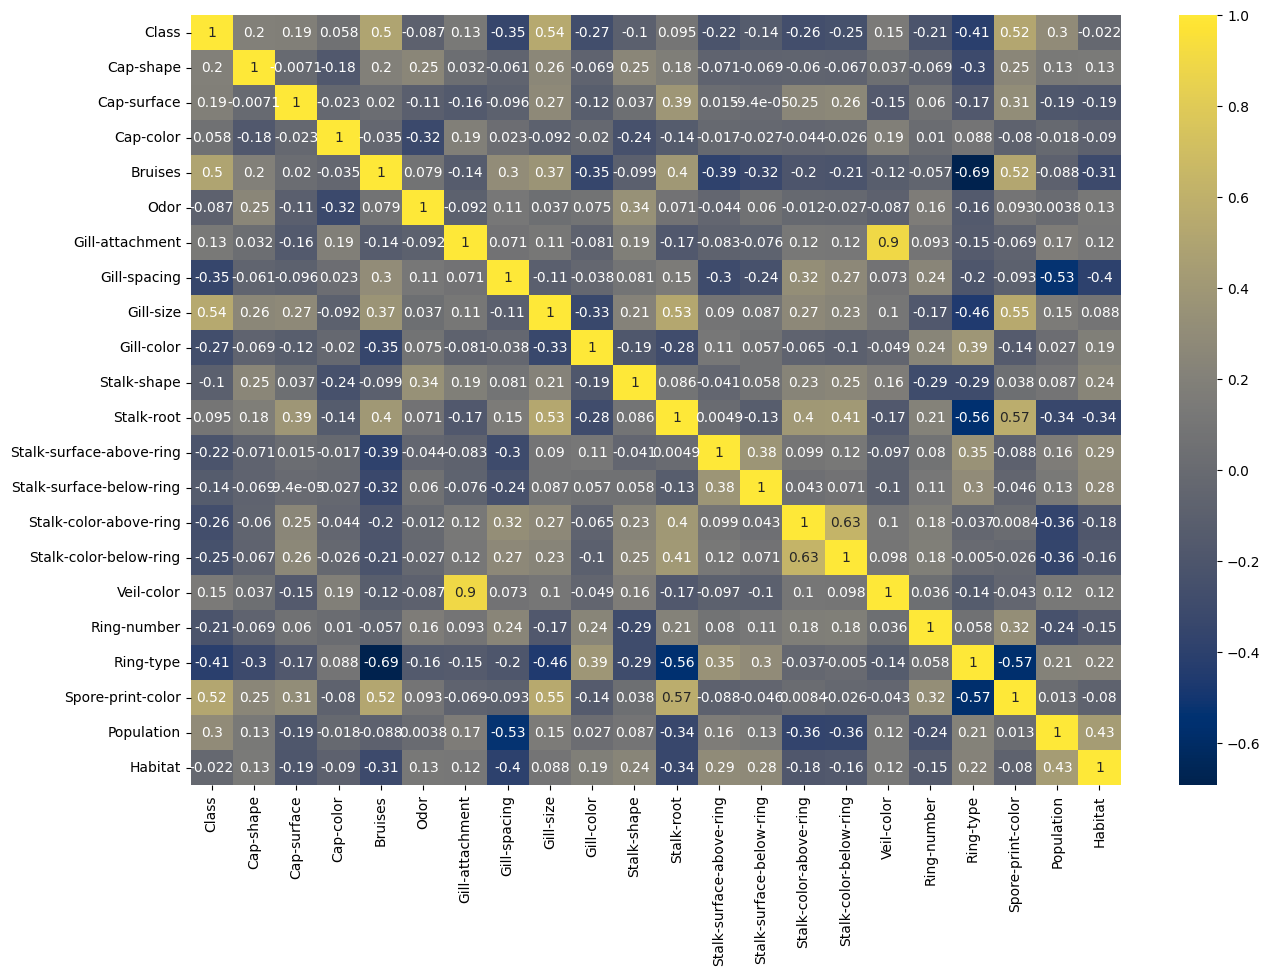

In [1036]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="cividis")

In [1037]:
# less or near to 0 correlation columns
# cap-colour
# odor
# stalk-root
# habitat

In [1038]:
### most positive correlated feature is gill-size while most negative correlated feature is ring-type

In [1039]:
#pca
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [1040]:
scale=sc.fit_transform(df1)

In [1041]:
from sklearn.decomposition import PCA

In [1042]:
pca=PCA(n_components=2)

In [1043]:
pca_data=pca.fit_transform(scale)

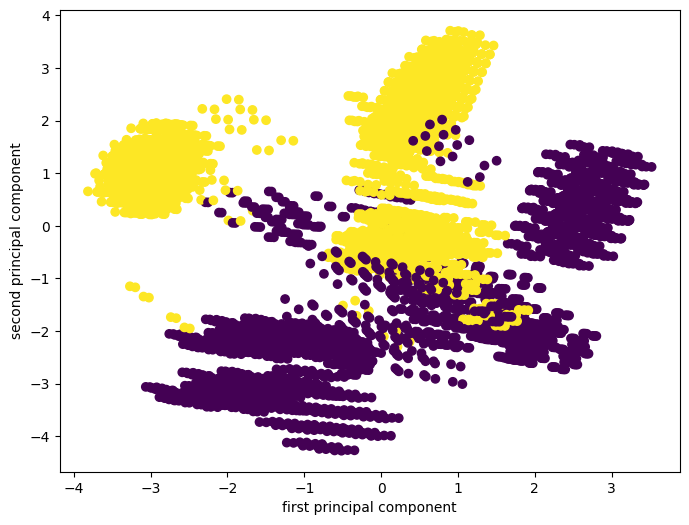

In [1044]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=df1["Class"],cmap="viridis")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [1045]:
# not  much good result so applying t sne

In [1046]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tsne_data=tsne.fit_transform(scale)

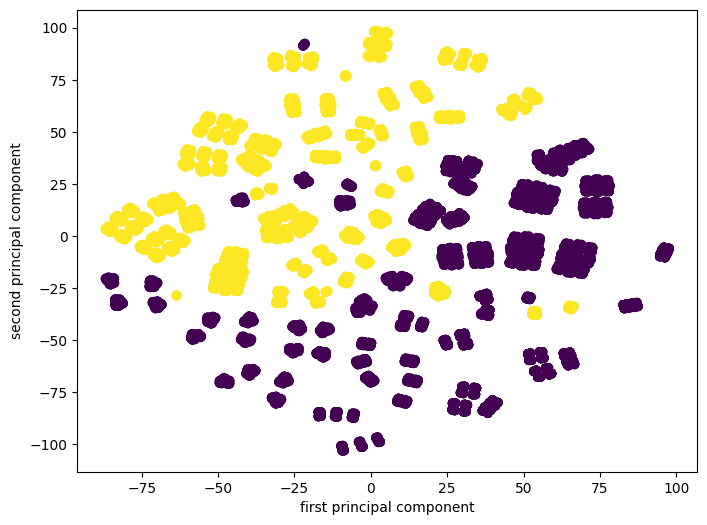

In [1047]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=df1["Class"],cmap="viridis")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()


In [1048]:
# the features seems separable after using tsne

In [1049]:
# removing cap-shape and odor as it is nearly 0 correlation with the target column

In [1050]:
x1=df1.drop(columns=["Class","Cap-shape","Odor"])
y1=df1["Class"]

In [1051]:
from sklearn.model_selection import train_test_split

In [1052]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2)

In [1053]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [1054]:
lr.fit(xtrain,ytrain)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1055]:
lr.score(xtest,ytest)

0.9569230769230769

In [1056]:
from sklearn.svm import SVC

In [1057]:
s=SVC()

In [1058]:
s.fit(xtrain,ytrain)

SVC()

In [1059]:
s.score(xtest,ytest)

0.9950769230769231

In [1060]:
from sklearn.model_selection import GridSearchCV
gr=GridSearchCV(estimator=s,param_grid={'kernel':['linear','poly','rbf','sigmoid']},scoring='accuracy',cv=5)

In [1061]:
gr.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [1062]:
gr.best_params_

{'kernel': 'poly'}

In [1063]:
gr.best_score_

0.9983073370047967